# Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from Kaggle, and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from Kaggle
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in Kaggle's `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the three "configurations":

1. Using a `tensorflow` network
2. Using a `keras` "sequential" network
3. Using a `keras` convolutional network
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [96]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

In [102]:
# Load in my training and testing data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Set up my X and y
X = train.drop(columns='label')
y = train['label']

# There are 10 targets in the label column so I need to one hot encode it
oh = OneHotEncoder(
    sparse=False,
    dtype=int,
    categories="auto"
)
# Fit transform the one hot incoded y values
y = oh.fit_transform(y.values.reshape(-1, 1))

# Normalize the X variables and reshape both X and the testing set
X = X / 255.0
test = test / 255.0
X = X.values.reshape(42_000, 28, 28, 1)

test = test.values.reshape(28_000, 28, 28, 1)

In [106]:
# Instansiate a Keras Sequential FNN (feed forward Neural Network)
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(X.shape[1],)))
model.add(Dropout(rate=0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"])

history = model.fit(
    X, y,
    batch_size=512,
    epochs=20,
    validation_split=0.2
)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 4s 118us/step - loss: 1.4944 - acc: 0.4618 - val_loss: 0.4961 - val_acc: 0.8645
Epoch 2/20
33600/33600 [==============================] - 2s 72us/step - loss: 0.6083 - acc: 0.8143 - val_loss: 0.2483 - val_acc: 0.9280
Epoch 3/20
33600/33600 [==============================] - 2s 69us/step - loss: 0.3889 - acc: 0.8944 - val_loss: 0.1794 - val_acc: 0.9495
Epoch 4/20
33600/33600 [==============================] - 2s 68us/step - loss: 0.2938 - acc: 0.9221 - val_loss: 0.1529 - val_acc: 0.9568
Epoch 5/20
33600/33600 [==============================] - 2s 67us/step - loss: 0.2451 - acc: 0.9368 - val_loss: 0.1487 - val_acc: 0.9590
Epoch 6/20
33600/33600 [==============================] - 2s 67us/step - loss: 0.2098 - acc: 0.9454 - val_loss: 0.1310 - val_acc: 0.9654
Epoch 7/20
33600/33600 [==============================] - 2s 67us/step - loss: 0.1884 - acc: 0.9524 - val_loss: 0.1321 - val_acc

In [107]:
# Create  DF for Kaggle Submissions
header = (np.linspace(1, 28000, 28000).astype(int))
submission_ = pd.DataFrame(model.predict_classes(test), columns=['Label'])
submission_['ImageId'] = header
submission_ = submission_[['ImageId', 'Label']]

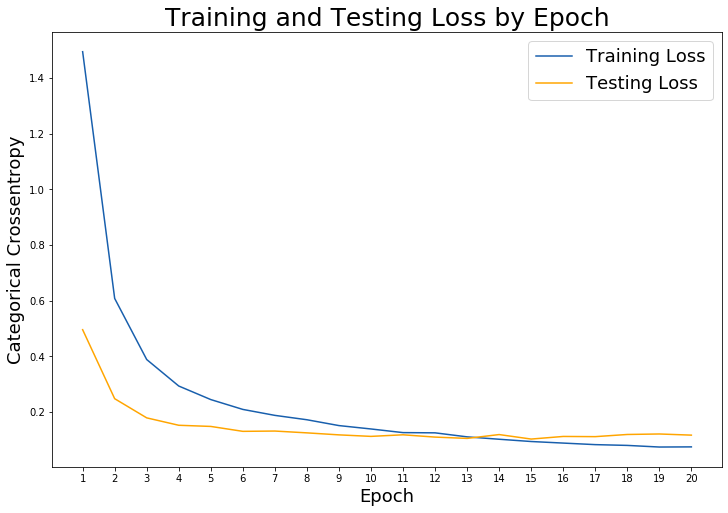

In [108]:
ticks_1 = (np.linspace(0, 19, 20).astype(int))
ticks_2 = (np.linspace(1, 20, 20).astype(int))

# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(ticks_1, ticks_2)
plt.legend(fontsize = 18);

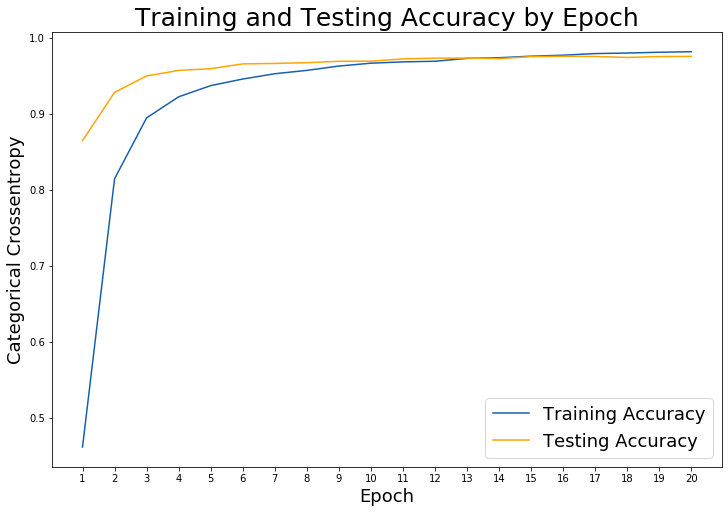

In [110]:
ticks_1 = (np.linspace(0, 19, 20).astype(int))
ticks_2 = (np.linspace(1, 20, 20).astype(int))

# Check out our train accuracy and accuracy loss over epochs.
train_loss = history.history['acc']
test_loss = history.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing accuracy over epochs.
plt.plot(train_loss, label='Training Accuracy', color='#185fad')
plt.plot(test_loss, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(ticks_1, ticks_2)
plt.legend(fontsize = 18);

In [84]:
# Now instantiate a CNN. This model will use Max Pooling and a Dropout rate as well as filters.
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation="relu"))
cnn_model.add(Dropout(rate=0.35))
cnn_model.add(Dense(256, activation="relu"))
cnn_model.add(Dropout(rate=0.35))
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dropout(rate=0.35))
cnn_model.add(Dense(64, activation="relu"))
cnn_model.add(Dropout(rate=0.35))
cnn_model.add(Dense(10, activation="softmax"))

cnn_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"])

history_cnn = cnn_model.fit(
    X, y,
    batch_size=256,
    epochs=25,
    validation_split=0.2
)

Train on 33600 samples, validate on 8400 samples
Epoch 1/25
33600/33600 [==============================] - 18s 522us/step - loss: 0.8544 - acc: 0.7079 - val_loss: 0.1361 - val_acc: 0.9618
Epoch 2/25
33600/33600 [==============================] - 20s 609us/step - loss: 0.1755 - acc: 0.9527 - val_loss: 0.0859 - val_acc: 0.9763
Epoch 3/25
33600/33600 [==============================] - 20s 607us/step - loss: 0.1209 - acc: 0.9683 - val_loss: 0.0604 - val_acc: 0.9839
Epoch 4/25
33600/33600 [==============================] - 21s 627us/step - loss: 0.0976 - acc: 0.9756 - val_loss: 0.0569 - val_acc: 0.9843
Epoch 5/25
33600/33600 [==============================] - 21s 613us/step - loss: 0.0775 - acc: 0.9793 - val_loss: 0.0580 - val_acc: 0.9850
Epoch 6/25
33600/33600 [==============================] - 17s 518us/step - loss: 0.0657 - acc: 0.9846 - val_loss: 0.0512 - val_acc: 0.9861
Epoch 7/25
33600/33600 [==============================] - 18s 536us/step - loss: 0.0582 - acc: 0.9843 - val_loss: 0.0

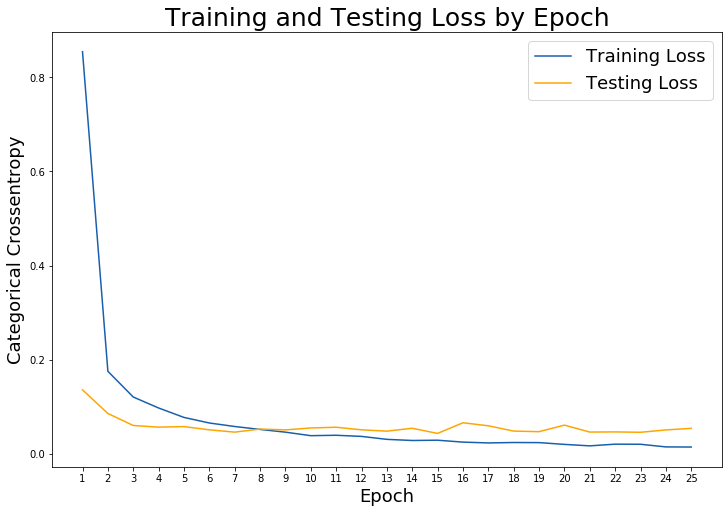

In [113]:
ticks_1 = (np.linspace(0, 24, 25).astype(int))
ticks_2 = (np.linspace(1, 25, 25).astype(int))

# Check out our train loss and test loss over epochs.
train_loss = history_cnn.history['loss']
test_loss = history_cnn.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(ticks_1, ticks_2)
plt.legend(fontsize = 18);

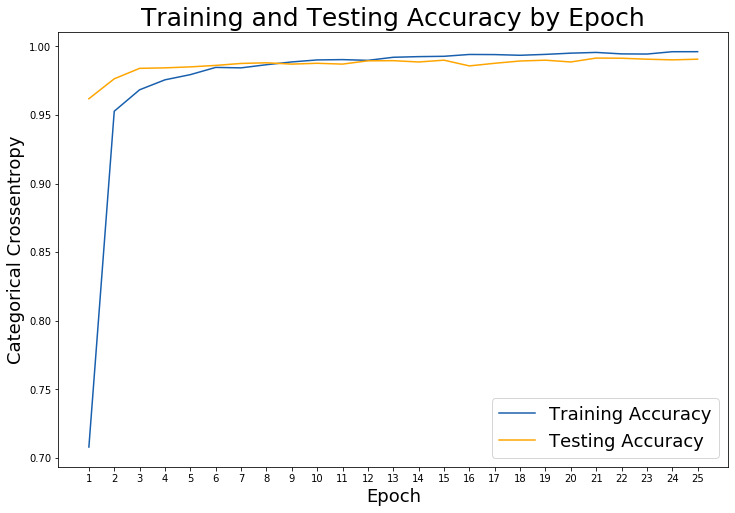

In [112]:
ticks_1 = (np.linspace(0, 24, 25).astype(int))
ticks_2 = (np.linspace(1, 25, 25).astype(int))

# Check out our train accuracy and test accuracy over epochs.
train_loss = history_cnn.history['acc']
test_loss = history_cnn.history['val_acc']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing accuracy over epochs.
plt.plot(train_loss, label='Training Accuracy', color='#185fad')
plt.plot(test_loss, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(ticks_1, ticks_2)
plt.legend(fontsize = 18);

In [94]:
# Create a DF for submitting to Kaggle
header = (np.linspace(1, 28000, 28000).astype(int))
submission = pd.DataFrame(cnn_model.predict_classes(test), columns=['Label'])
submission['ImageId'] = header
submission = submission[['ImageId', 'Label']]

In [95]:
submission.to_csv('submission.csv', index=False)